### KarmaLife AI - Data Scientist Round 2

#### Assignment: Predict the probabilities of default
-------------------------

##### Objective:
1. Develop a data-driven credit risk model to predict the probabilities of default (PD)
2. Can you assign credit scores to existing or potential borrowers

##### The solution is divided into the following sections: 
- Data understanding and exploration
- Data Visualisation 
- Data preparation
- Model building and evaluation

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading data
data = pd.read_csv('/Users/mitron/Downloads/Assignment for DS Candidates/loan_data.csv', low_memory=False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Dataset size
print(data.shape)
data.info()

(466285, 74)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null 

In [4]:
#Missing data
out = round(100*(data.isnull().sum()/len(data.index)),2)
print(out[out>0])

emp_title                        5.92
emp_length                       4.51
desc                            72.98
delinq_2yrs                      0.01
earliest_cr_line                 0.01
inq_last_6mths                   0.01
mths_since_last_delinq          53.69
mths_since_last_record          86.57
open_acc                         0.01
pub_rec                          0.01
revol_util                       0.07
total_acc                        0.01
last_pymnt_d                     0.08
next_pymnt_d                    48.73
last_credit_pull_d               0.01
collections_12_mths_ex_med       0.03
mths_since_last_major_derog     78.77
annual_inc_joint               100.00
dti_joint                      100.00
verification_status_joint      100.00
acc_now_delinq                   0.01
tot_coll_amt                    15.07
tot_cur_bal                     15.07
open_acc_6m                    100.00
open_il_6m                     100.00
open_il_12m                    100.00
open_il_24m 

In [5]:
# Droping columns with missing > 80% and less significant variables
drop_cols = ["mths_since_last_record", "annual_inc_joint", "dti_joint", "verification_status_joint", 
             "verification_status_joint", "open_acc_6m", "open_il_6m", "open_il_12m", "open_il_24m",
             "mths_since_rcnt_il", "total_bal_il", "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc", "all_util",
             "inq_fi", "total_cu_tl", "inq_last_12m", "desc", "next_pymnt_d", "mths_since_last_delinq",
             "mths_since_last_major_derog"]
data = data.drop(drop_cols, axis=1)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,Jan-15,171.62,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,Jun-14,649.91,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,Jan-15,357.48,Jan-15,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Jan-16,67.79,Jan-16,0.0,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [6]:
#Target variable
print(data["loan_status"].unique())

['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


In [7]:
#New Target variable - Loan Status
data["defaulted"] = data["loan_status"].map(lambda x: 1 if x in ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off"]
                                                 else 0 if x in ["Fully Paid", 'Does not meet the credit policy. Status:Fully Paid']
                                                 else -1)
len_prev = len(data)
data.query("defaulted != -1", inplace=True)
print(data["defaulted"].unique())

[0 1]


In [8]:
out = round(100*(data.isnull().sum()/len(data.index)),2)
print(out[out>0])

emp_title                      5.60
emp_length                     3.79
title                          0.01
delinq_2yrs                    0.01
earliest_cr_line               0.01
inq_last_6mths                 0.01
open_acc                       0.01
pub_rec                        0.01
revol_util                     0.10
total_acc                      0.01
last_pymnt_d                   0.16
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.06
acc_now_delinq                 0.01
tot_coll_amt                  28.80
tot_cur_bal                   28.80
total_rev_hi_lim              28.80
dtype: float64


In [9]:
#Target variable
print(data["defaulted"].unique())

[0 1]


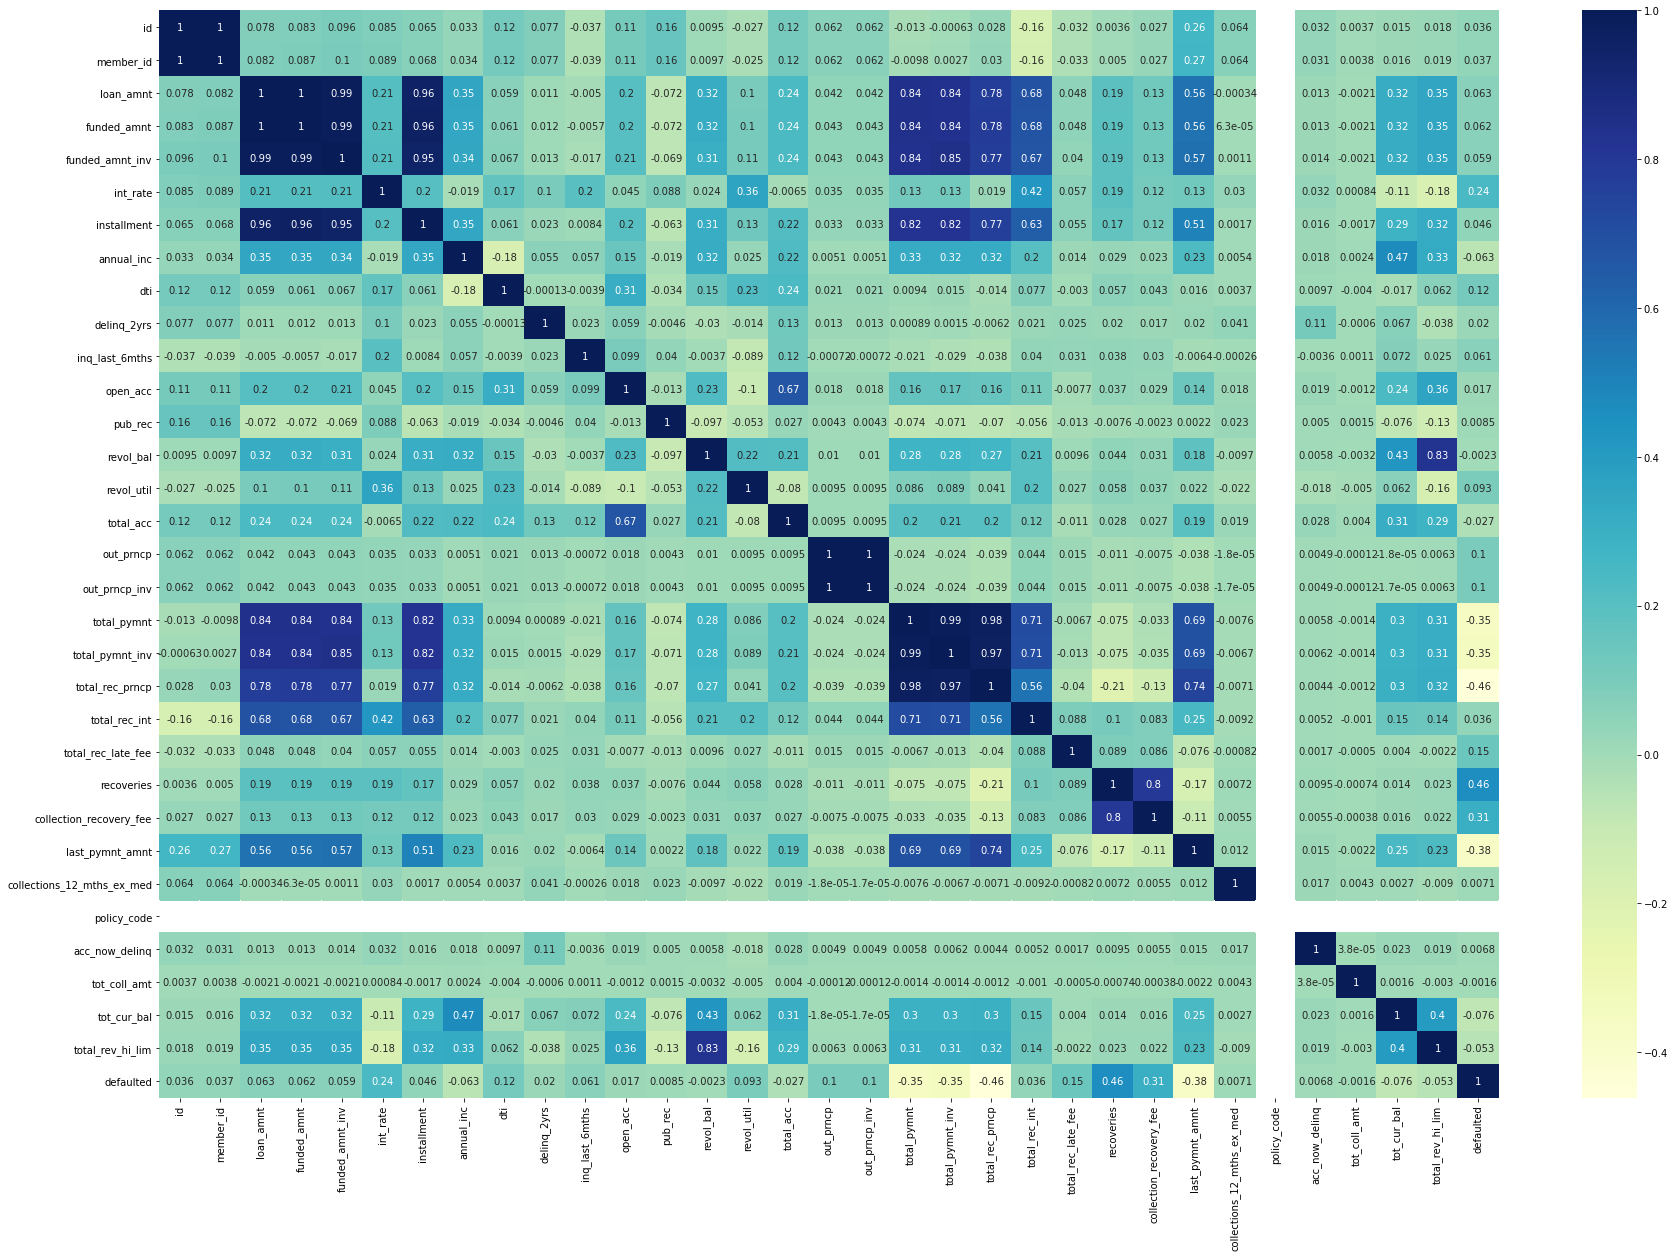

In [10]:
# plotting correlations on a heatmap
data_numeric = data.select_dtypes(include=['float64', 'int64'])
cor = data_numeric.corr()
plt.figure(figsize=(30,20))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

There is multicollinaerity in the data as two or more independent variables are highly correlated with one another.

#### Removing following columns which shows high correlation
- loan_amnt and funded_amnt show 100%
- loan_amnt and funded_amnt_inv show 99%
- loan_amnt and installment show 96%
- loan_amnt and total_payment show 84%
- loan_amnt and total_payment_inv show 84%
- loan_amnt and total_rec_princp show 78%
- total_payment and total_payment_inv shows 99%
- total_payment and total_rec_princp shows 98%
- revol_bal and total_rev_hi_lim shows 83%
- last_payment_amnt and total_rec_princp shows 74%
- recoveries and collection_recovery_fee shows 80%
- out_prncp and out_prncp_inv shows 100%


In [11]:
# Removing the highly correlated variables
data.drop(['funded_amnt', 'funded_amnt_inv','installment','total_pymnt','total_pymnt_inv','total_rec_prncp',
           'total_rev_hi_lim','collection_recovery_fee','out_prncp_inv'], axis = 1, inplace = True)

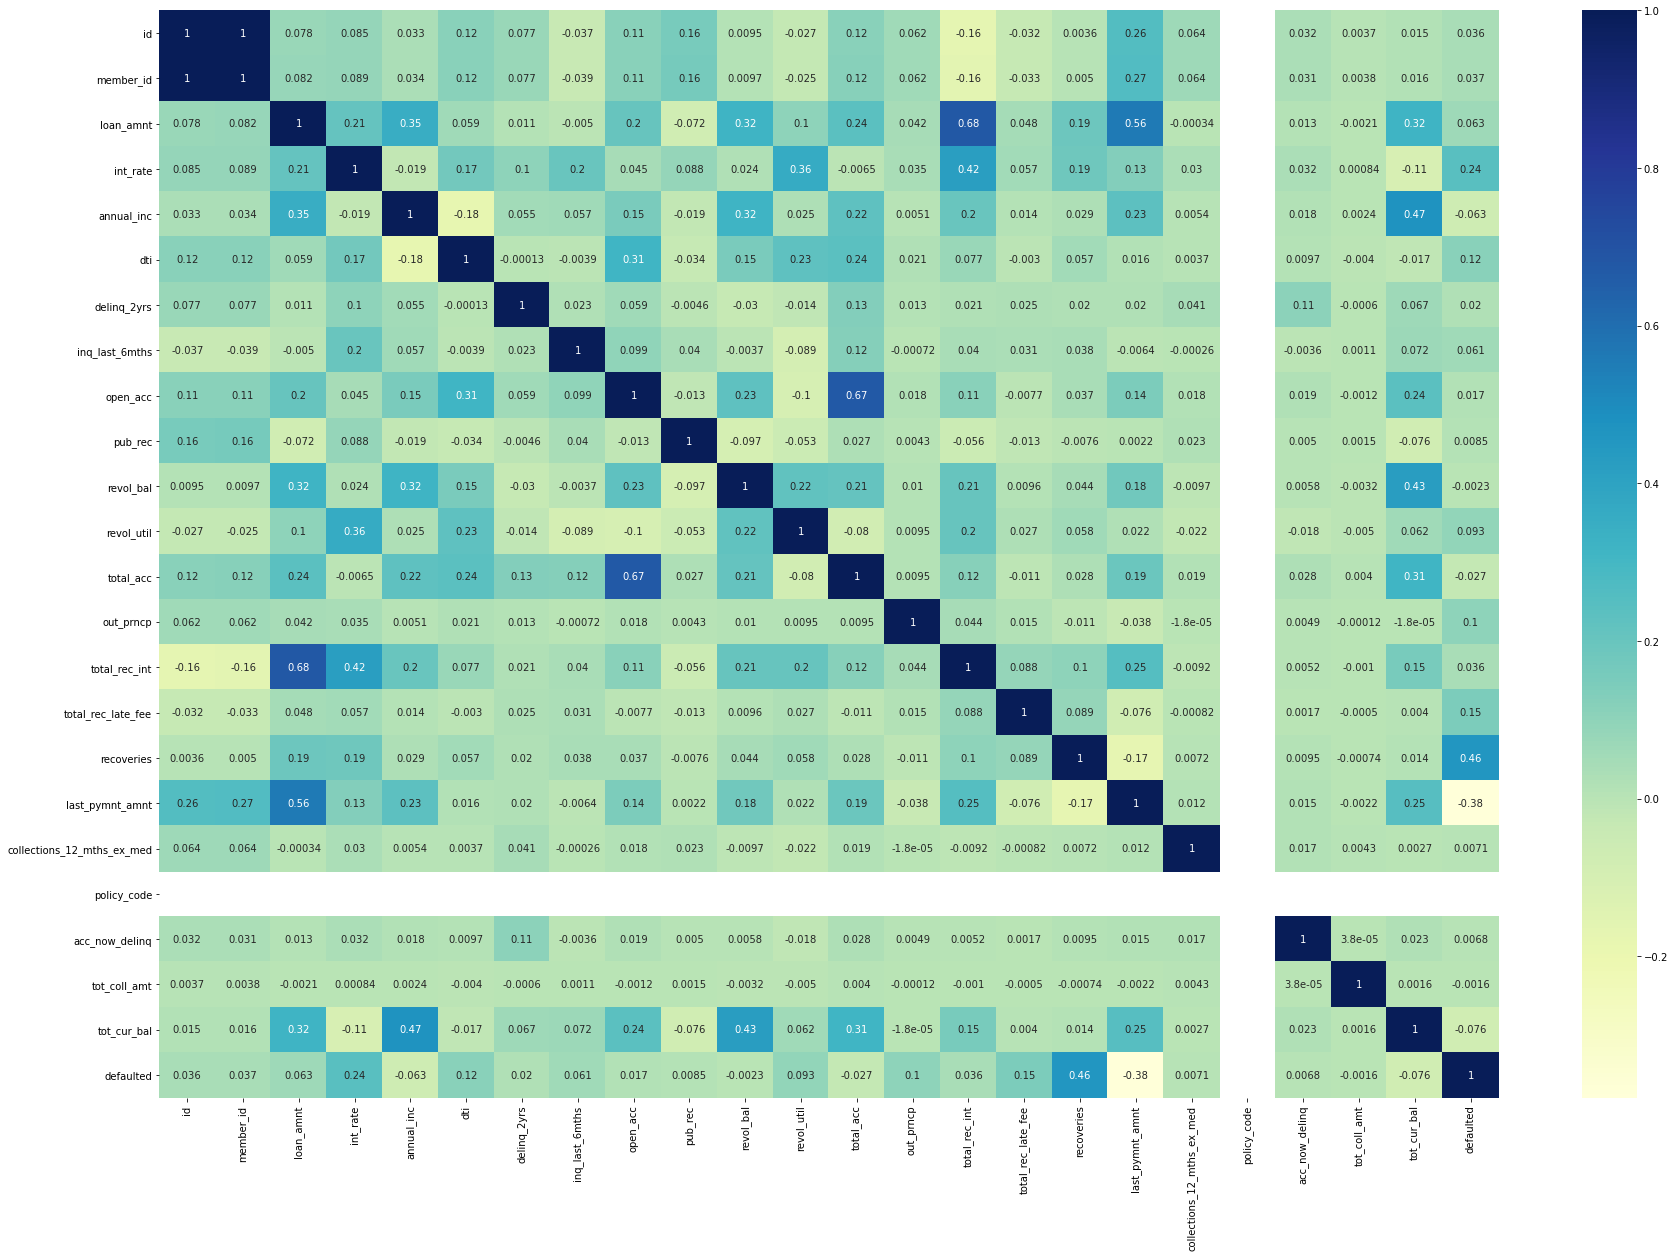

In [12]:
# plotting correlations on a heatmap
data_numeric = data.select_dtypes(include=['float64', 'int64'])
cor = data_numeric.corr()
plt.figure(figsize=(30,20))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### Imputing missing values

In [13]:
# Dropping rows where annual_inc and acc_now_delinq is missing 
data.dropna(subset=['annual_inc','acc_now_delinq'],inplace=True)
data.shape

(230766, 44)

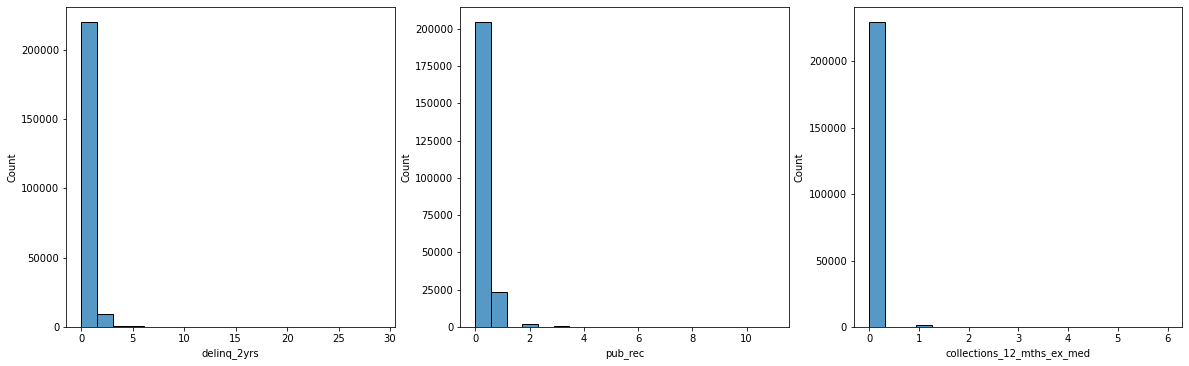

In [14]:
# Based on the distribution of the variables, replacing missing values with zero
# delinq_2yrs inq_last_6mths pub_rec collections_12_mths_ex_med 

plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.histplot(data['delinq_2yrs'])
plt.subplot(3,3,2)
sns.histplot(data['pub_rec'])
plt.subplot(3,3,3)
sns.histplot(data['collections_12_mths_ex_med'])
plt.show()

#data.inq_last_6mths.value_counts()

data[["delinq_2yrs", "pub_rec", "collections_12_mths_ex_med", "inq_last_6mths"]] = data[["delinq_2yrs", "pub_rec", "collections_12_mths_ex_med", "inq_last_6mths"]].fillna(0)

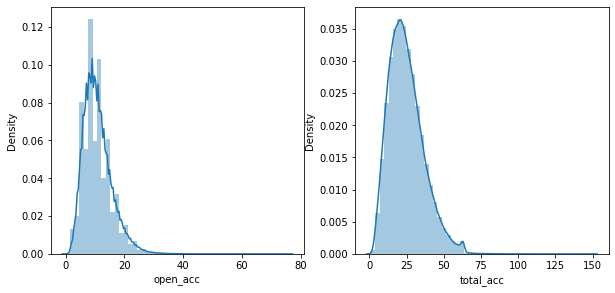

In [15]:
# Replacing variables with median - open_acc, total_acc
plt.figure(figsize=(10, 10))  
plt.subplot(2,2,1)
sns.distplot(data['open_acc'])
plt.subplot(2,2,2)
sns.distplot(data['total_acc'])
plt.show()

data['open_acc'].fillna(data['open_acc'].median(), inplace=True)
data['total_acc'].fillna(data['total_acc'].median(), inplace=True)


In [16]:
out = round(100*(data.isnull().sum()/len(data.index)),2)
print(out[out>0])

emp_title              5.59
emp_length             3.79
title                  0.01
revol_util             0.09
last_pymnt_d           0.16
last_credit_pull_d     0.01
tot_coll_amt          28.79
tot_cur_bal           28.79
dtype: float64


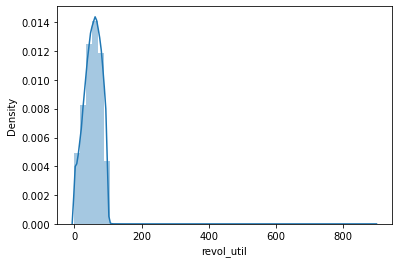

          median       mean
      revol_util revol_util
grade                      
A           34.6  36.845275
B           54.6  53.510756
C           60.8  59.005295
D           65.4  62.650504
E           67.8  64.462966
F           70.1  66.094316
G           72.5  67.910384
revol_util    53.510756
Name: B, dtype: float64


In [17]:
# Distribution - revol_util (based on grade), emp_length (based on annual_income)

sns.distplot(data['revol_util'])
plt.show()

revol_util_table = pd.pivot_table(data, index="grade", values="revol_util", aggfunc=[np.median, np.mean])
print(revol_util_table)

print(revol_util_table.xs('B')['mean'])

In [18]:
#Replacing missing values of revol_util with mean value of revol_util based on grade
data['revol_util'] = np.where((data['revol_util'].isnull()) & (data['grade']=="A"), revol_util_table.xs('A')['mean'], data['revol_util'])
data['revol_util'] = np.where((data['revol_util'].isnull()) & (data['grade']=="B"), revol_util_table.xs('B')['mean'], data['revol_util'])
data['revol_util'] = np.where((data['revol_util'].isnull()) & (data['grade']=="C"), revol_util_table.xs('C')['mean'], data['revol_util'])
data['revol_util'] = np.where((data['revol_util'].isnull()) & (data['grade']=="D"), revol_util_table.xs('D')['mean'], data['revol_util'])
data['revol_util'] = np.where((data['revol_util'].isnull()) & (data['grade']=="E"), revol_util_table.xs('E')['mean'], data['revol_util'])
data['revol_util'] = np.where((data['revol_util'].isnull()) & (data['grade']=="F"), revol_util_table.xs('F')['mean'], data['revol_util'])
data['revol_util'] = np.where((data['revol_util'].isnull()) & (data['grade']=="G"), revol_util_table.xs('G')['mean'], data['revol_util'])


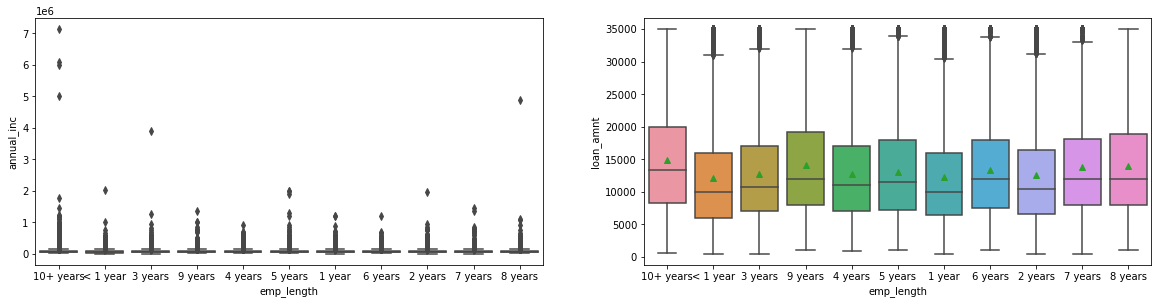

In [19]:
# Distribution - emp_length (based on annual_income / loan_amnt)
plt.figure(figsize=(20, 10))  
plt.subplot(2,2,1)
sns.boxplot(x = 'emp_length', y = 'annual_inc', data = data)
plt.subplot(2,2,2)
sns.boxplot(x = 'emp_length', y = 'loan_amnt', data = data, showmeans=True)
plt.show()


In [20]:
# Dropping less significant variables
data.drop(['title','policy_code','url','earliest_cr_line','zip_code','purpose', 'last_pymnt_d','last_credit_pull_d',
           'tot_cur_bal','tot_coll_amt','emp_length','emp_title'], axis = 1, inplace = True)

#### Treating Outliers

In [21]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,id,member_id,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,revol_util,total_acc,out_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,defaulted
count,2.307660e+05,2.307660e+05,230766.000000,230766.000000,2.307660e+05,230766.000000,230766.000000,230766.000000,230766.000000,230766.000000,...,230766.000000,230766.000000,230766.000000,230766.00000,230766.000000,230766.000000,230766.000000,230766.000000,230766.000000,230766.000000
mean,8.270577e+06,9.363098e+06,13413.382062,13.782324,7.200440e+04,16.349971,0.243303,0.907668,10.827878,0.132819,...,54.833947,24.790181,37.961288,2086.28060,0.805899,172.421094,5841.787568,0.005694,0.002782,0.190951
std,9.088360e+06,9.872501e+06,8042.731914,4.368695,5.542476e+04,7.672242,0.724509,1.175999,4.812351,0.417652,...,24.726818,11.656471,761.637740,2116.10089,5.791318,775.273028,6896.072220,0.081970,0.057472,0.393051
min,5.473400e+04,7.069400e+04,500.000000,5.420000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350253e+06,1.588818e+06,7200.000000,10.740000,4.500000e+04,10.650000,0.000000,0.000000,7.000000,0.000000,...,37.000000,16.000000,0.000000,730.68000,0.000000,0.000000,437.752500,0.000000,0.000000,0.000000
50%,5.049702e+06,6.037384e+06,12000.000000,13.650000,6.192250e+04,16.050000,0.000000,1.000000,10.000000,0.000000,...,56.500000,23.000000,0.000000,1437.85500,0.000000,0.000000,3268.850000,0.000000,0.000000,0.000000
75%,1.197560e+07,1.388776e+07,18000.000000,16.400000,8.600000e+04,21.777500,0.000000,1.000000,13.000000,0.000000,...,74.400000,32.000000,0.000000,2646.21000,0.000000,0.000000,9082.475000,0.000000,0.000000,0.000000
90%,2.241303e+07,2.472466e+07,25000.000000,19.520000,1.200000e+05,26.780000,1.000000,2.000000,17.000000,1.000000,...,87.000000,41.000000,0.000000,4583.58000,0.000000,20.085000,15800.800000,0.000000,0.000000,1.000000
95%,2.963556e+07,3.215853e+07,30000.000000,21.700000,1.450000e+05,29.580000,1.000000,3.000000,20.000000,1.000000,...,92.400000,47.000000,0.000000,6290.57500,0.000000,1200.000000,20279.755000,0.000000,0.000000,1.000000
99%,3.573375e+07,3.842910e+07,35000.000000,24.700000,2.350000e+05,33.810000,3.000000,5.000000,25.000000,2.000000,...,97.700000,59.000000,0.000000,10455.28300,29.488681,3764.786000,29296.590000,0.000000,0.000000,1.000000


0.10      33000
0.20      40500
0.30      48000
0.40      55000
0.50      61922
0.60      70000
0.70      80000
0.80      95000
0.90     120000
0.95     145000
0.96     152103
0.97     169992
0.98     190000
0.99     235000
1.00    7141778
Name: annual_inc, dtype: int64

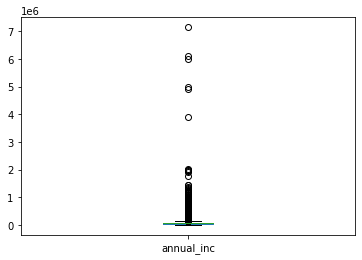

In [22]:
#annual_inc delinq_2yrs inq_last_6mths open_acc pub_rec
data[data['annual_inc']>0].annual_inc.plot.box()
chk = data.quantile([.1, .2,.3,.4, .5, .6,.7,.8,.9,.95,.96,.97,.98,.99,1], axis = 0).astype('int64')
chk['annual_inc']

In [23]:
# Cap outliers in all numeric variables with k-sigma technique
def cap_outlier(v_array, k=3):
    upper_limit = v_array.mean() + k*v_array.std()
    lower_limit = v_array.mean() - k*v_array.std()
    v_array[v_array<lower_limit] = lower_limit
    v_array[v_array>upper_limit] = upper_limit
    return v_array

In [24]:
# Updating num_cols column name list and capping outliers in the numeric columns
data_numeric1 = data_numeric.drop(['id', 'member_id','defaulted','policy_code','tot_coll_amt','tot_cur_bal'], axis = 1)
num_cols = [col for col in data_numeric1.columns]

# Cap outliers in the numeric columns
data[num_cols] = data[num_cols].apply(cap_outlier, axis=0)

In [25]:
data.describe()

,id,member_id,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,revol_util,total_acc,out_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,defaulted
count,2.307660e+05,2.307660e+05,230766.000000,230766.000000,230766.000000,230766.000000,230766.000000,230766.000000,230766.000000,230766.000000,...,230766.000000,230766.000000,230766.000000,230766.000000,230766.000000,230766.000000,230766.000000,230766.000000,230766.000000,230766.000000
mean,8.270577e+06,9.363098e+06,13413.382062,13.782324,70790.705101,16.349857,0.213798,0.889314,10.787466,0.119039,...,54.830366,24.750010,8.159266,2030.438775,0.486772,133.896049,5776.977105,0.001331,0.000455,0.190951
std,9.088360e+06,9.872501e+06,8042.731914,4.368695,38672.293326,7.671898,0.538905,1.085672,4.651983,0.333870,...,24.664828,11.513679,136.583993,1870.925998,2.836427,486.543192,6671.957169,0.018253,0.008914,0.393051
min,5.473400e+04,7.069400e+04,500.000000,5.420000,1896.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350253e+06,1.588818e+06,7200.000000,10.740000,45000.000000,10.650000,0.000000,0.000000,7.000000,0.000000,...,37.000000,16.000000,0.000000,730.680000,0.000000,0.000000,437.752500,0.000000,0.000000,0.000000
50%,5.049702e+06,6.037384e+06,12000.000000,13.650000,61922.500000,16.050000,0.000000,1.000000,10.000000,0.000000,...,56.500000,23.000000,0.000000,1437.855000,0.000000,0.000000,3268.850000,0.000000,0.000000,0.000000
75%,1.197560e+07,1.388776e+07,18000.000000,16.400000,86000.000000,21.777500,0.000000,1.000000,13.000000,0.000000,...,74.400000,32.000000,0.000000,2646.210000,0.000000,0.000000,9082.475000,0.000000,0.000000,0.000000
max,3.785416e+07,4.061688e+07,35000.000000,26.060000,238278.678902,39.366698,2.416829,4.435664,25.264932,1.385775,...,129.014401,59.759596,2322.874507,8434.583271,18.179854,2498.240178,26530.004229,0.251603,0.175197,1.000000


#### Data Visulization

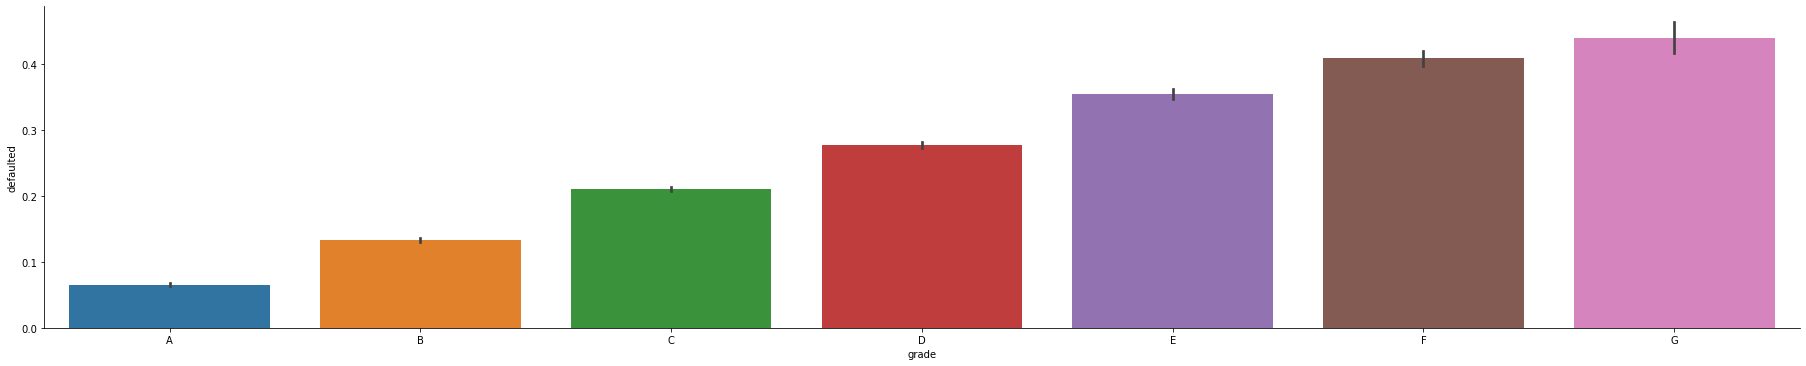

In [26]:
def graph_varlist(x,y):
    grades = sorted(data[x].unique())
    grade_default_prob = {}
    grade_n = {}
    for g in grades:
        g_rows = data[data[x] == g]
        default_frac = g_rows[y].sum() / len(g_rows)
        grade_default_prob[g] = default_frac
    sns.catplot(x, y, data=data, kind="bar", aspect=5, order=grades)
    
graph_varlist("grade","defaulted")

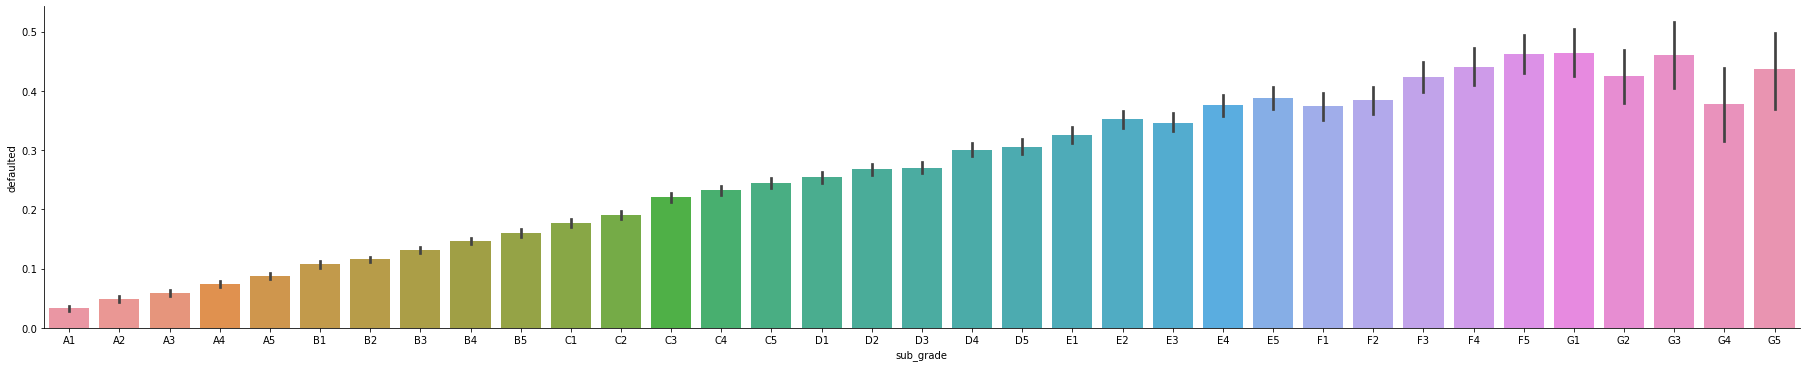

In [27]:
graph_varlist("sub_grade","defaulted")

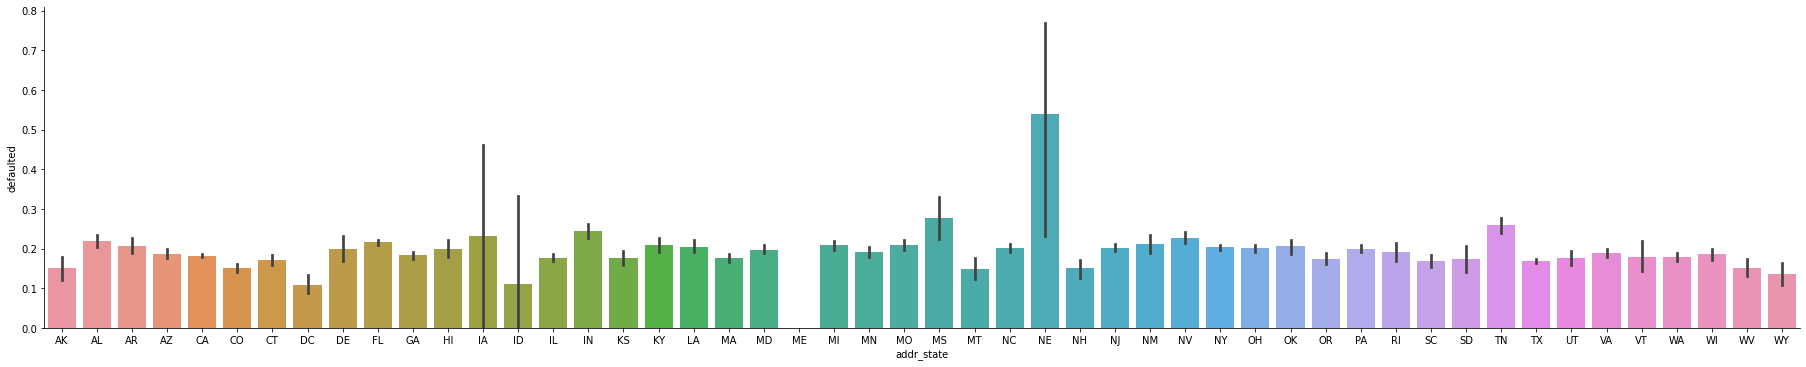

In [28]:
graph_varlist("addr_state","defaulted")

#### Analyses on Categorical Variables

In [29]:
# plotting correlations on a heatmap
data_cat = data.select_dtypes(include=['object'])
data_cat

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,addr_state,initial_list_status,application_type
0,36 months,B,B2,RENT,Verified,Dec-11,Fully Paid,n,AZ,f,INDIVIDUAL
1,60 months,C,C4,RENT,Source Verified,Dec-11,Charged Off,n,GA,f,INDIVIDUAL
2,36 months,C,C5,RENT,Not Verified,Dec-11,Fully Paid,n,IL,f,INDIVIDUAL
3,36 months,C,C1,RENT,Source Verified,Dec-11,Fully Paid,n,CA,f,INDIVIDUAL
5,36 months,A,A4,RENT,Source Verified,Dec-11,Fully Paid,n,AZ,f,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...
466276,60 months,D,D3,MORTGAGE,Verified,Jan-14,Charged Off,n,MA,f,INDIVIDUAL
466277,36 months,A,A4,RENT,Verified,Jan-14,Charged Off,n,MD,f,INDIVIDUAL
466278,36 months,D,D3,RENT,Source Verified,Jan-14,Fully Paid,n,VA,f,INDIVIDUAL
466281,60 months,D,D5,MORTGAGE,Verified,Jan-14,Charged Off,n,TN,f,INDIVIDUAL


In [30]:
# Dropping less significant categorical variables and converting into dummies using one hot encoding
data.drop(['loan_status','issue_d','application_type','id','member_id'], axis = 1, inplace = True)

data_categorical = data.select_dtypes(include=['object'])
data_categorical.columns

#One hot encoding
data_dummies = pd.get_dummies(data_categorical, drop_first=True)
data_dummies.head()

# drop categorical variables 
data = data.drop(list(data_categorical.columns), axis=1)
data = pd.concat([data, data_dummies], axis=1)

data.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,5000,10.65,24000.0,27.65,0.0,1.000000,3.0,0.0,13648.0,83.7,...,0,0,0,0,0,0,0,0,0,0
1,2500,15.27,30000.0,1.00,0.0,4.435664,3.0,0.0,1687.0,9.4,...,0,0,0,0,0,0,0,0,0,0
2,2400,15.96,12252.0,8.72,0.0,2.000000,2.0,0.0,2956.0,98.5,...,0,0,0,0,0,0,0,0,0,0
3,10000,13.49,49200.0,20.00,0.0,1.000000,10.0,0.0,5598.0,21.0,...,0,0,0,0,0,0,0,0,0,0
5,5000,7.90,36000.0,11.20,0.0,3.000000,9.0,0.0,7963.0,28.3,...,0,0,0,0,0,0,0,0,0,0


In [31]:
data.shape

(230766, 118)

In [32]:
data.reset_index(drop=True, inplace=True)
data.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,5000,10.65,24000.0,27.65,0.0,1.000000,3.0,0.0,13648.0,83.7,...,0,0,0,0,0,0,0,0,0,0
1,2500,15.27,30000.0,1.00,0.0,4.435664,3.0,0.0,1687.0,9.4,...,0,0,0,0,0,0,0,0,0,0
2,2400,15.96,12252.0,8.72,0.0,2.000000,2.0,0.0,2956.0,98.5,...,0,0,0,0,0,0,0,0,0,0
3,10000,13.49,49200.0,20.00,0.0,1.000000,10.0,0.0,5598.0,21.0,...,0,0,0,0,0,0,0,0,0,0
4,5000,7.90,36000.0,11.20,0.0,3.000000,9.0,0.0,7963.0,28.3,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data.defaulted.value_counts()

0    186701
1     44065
Name: defaulted, dtype: int64

#### Model Building

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


In [35]:
# Split data into train and test sets as well as for validation and testing
# Let's split data into train and test sets
X = data.drop("defaulted", axis = 1)
y = data.defaulted
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

#### Feature Scaling

In [36]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
75467,-0.425406,-0.716208,-0.434828,-1.456377,-0.396947,0.103346,-1.029258,2.634272,-0.325622,0.932318,...,0,0,0,0,0,0,0,0,0,0
210835,0.196614,0.420647,-0.021971,1.147323,-0.396947,-0.817542,3.115609,-0.356961,0.770792,-1.261749,...,0,1,0,0,0,0,0,0,0,1
216650,0.345899,2.209419,-0.280007,1.057360,-0.396947,1.945121,0.261647,-0.356961,-0.290464,1.070207,...,0,0,0,0,0,0,1,0,0,0
35637,-1.047427,-0.212972,-0.893486,-0.620637,-0.396947,-0.817542,-1.244409,-0.356961,-0.772847,-0.969748,...,0,1,0,0,0,0,0,0,0,0
141064,0.321018,1.989826,0.107046,1.775757,-0.396947,-0.817542,1.982854,-0.356961,1.427966,0.879595,...,0,0,0,0,0,1,0,0,0,0


In [37]:
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
38791,-0.176598,0.111843,0.494099,0.006493,1.459532,3.267206,2.843457,-0.356961,-0.432016,0.283425,...,0,0,0,0,0,0,0,0,0,0
149970,0.818634,-0.023115,-0.228400,-0.359876,-0.396947,1.024233,-0.814107,-0.356961,-0.060097,0.753872,...,0,0,1,0,0,0,0,0,0,0
107218,-0.425406,1.138901,-1.054112,1.644073,-0.396947,0.103346,1.122250,-0.356961,0.058580,0.275314,...,0,0,0,0,0,0,0,0,0,1
165530,-0.375645,-0.533213,0.184457,-0.084773,3.316011,1.024233,0.907100,-0.356961,-0.071841,-0.499301,...,0,0,0,0,0,0,0,0,0,1
82402,1.254048,0.576192,-0.228400,-0.469396,-0.396947,0.103346,0.046496,-0.356961,0.589937,1.435209,...,0,0,0,0,0,0,0,0,0,1


In [38]:
# print shapes of train and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(173074, 117)
(173074,)
(57692, 117)
(57692,)


#### Imbalance class - Random under-sampling with imblearn

In [39]:
from imblearn.under_sampling import RandomUnderSampler
import collections

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X_train, y_train)

print('original dataset shape:', collections.Counter(y_train))
print('Resample dataset shape', collections.Counter(y_rus))

original dataset shape: Counter({0: 140025, 1: 33049})
Resample dataset shape Counter({0: 33049, 1: 33049})


#### Logistic regression model

In [40]:
# Logistic regression model
logm1 = sm.GLM(y_rus,(sm.add_constant(X_rus)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              defaulted   No. Observations:                66098
Model:                            GLM   Df Residuals:                    65987
Model Family:                Binomial   Df Model:                          110
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 04 May 2022   Deviance:                   8.6835e+05
Time:                        12:23:58   Pearson chi2:                 4.25e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                               -4.511e+15   6.74e+07  -6.69e+07      0.000   -4.51e+15   -4.51e+15
loan_amnt                            5.686e+14    4.7e+05   1.21e+09      0.000    5.69e+14    5.69e+14
int_rate                             4.899e+14   1.11e+06   4.41e+08      0.000     4.9e+14     4.9e+14
annual_inc                           -1.03e+14   3.62e+05  -2.85e+08      0.000   -1.03e+14   -1.03e+14
dti                                  9.788e+13   3.13e+05   3.13e+08      0.000    9.79e+13    9.79e+13
delinq_2yrs                          -7.32e+12   2.67e+05  -2.74e+07      0.000   -7.32e+12   -7.32e+12
inq_last_6mths                        2.09e+13   2.75e+05    7.6e+07      0.000    2.09e+13    2.09e+13
open_acc                             3.082e+13   3.77e+05   8.17e+07      0.000    3.08e+13    3.08e+13
pub_rec                              8.097e+13   2.71e+05   2.98e+08      0.000     8.1e+13     8.1e+13
revol_bal                           -3.591e+13    3.5e+05  -1.03e+08      0.000   -3.59e+13   -3.59e+13
revol_util                           1.314e+13    3.3e+05   3.98e+07      0.000    1.31e+13    1.31e+13
total_acc                            3.137e+13   3.81e+05   8.23e+07      0.000    3.14e+13    3.14e+13
out_prncp                            2.574e+14   1.63e+05   1.58e+09      0.000    2.57e+14    2.57e+14
total_rec_int                       -6.373e+14    4.1e+05  -1.56e+09      0.000   -6.37e+14   -6.37e+14
total_rec_late_fee                   1.089e+14      2e+05   5.44e+08      0.000    1.09e+14    1.09e+14
recoveries                           1.201e+15   2.07e+05   5.79e+09      0.000     1.2e+15     1.2e+15
last_pymnt_amnt                     -1.832e+15   3.65e+05  -5.02e+09      0.000   -1.83e+15   -1.83e+15
collections_12_mths_ex_med           7.645e+12   2.61e+05   2.93e+07      0.000    7.64e+12    7.64e+12
acc_now_delinq                       -4.85e+12   2.48e+05  -1.95e+07      0.000   -4.85e+12   -4.85e+12
term_ 60 months                      7.241e+14   7.71e+05   9.39e+08      0.000    7.24e+14    7.24e+14
grade_B                             -4.178e+14   2.09e+06     -2e+08      0.000   -4.18e+14   -4.18e+14
grade_C                             -4.565e+14   2.55e+06  -1.79e+08      0.000   -4.56e+14   -4.56e+14
grade_D                             -6.059e+14   3.04e+06  -1.99e+08      0.000   -6.06e+14   -6.06e+14
grade_E                             -7.179e+14   3.57e+06  -2.01e+08      0.000   -7.18e+14   -7.18e+14
grade_F                             -7.848e+14   4.17e+06  -1.88e+08      0.000   -7.85e+14   -7.85e+14
grade_G                             -6.756e+14   4.73e+06  -1.43e+08      0.000   -6.76e+14   -6.76e+14
sub_grade_A2                        -1.499e+14   2.78e+06  -5.39e+0

##### Feature Selection Using RFE

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [42]:
from sklearn.feature_selection import RFE
# rfe = RFE(logreg, 15)             # running RFE with 12 variables as output
rfe = RFE(logreg, n_features_to_select= 15)
# rfe = rfe.fit(X_train, y_train)
rfe = rfe.fit(X_rus, y_rus)

In [43]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loan_amnt', True, 1),
 ('int_rate', True, 1),
 ('annual_inc', False, 22),
 ('dti', False, 20),
 ('delinq_2yrs', False, 101),
 ('inq_last_6mths', False, 76),
 ('open_acc', False, 66),
 ('pub_rec', False, 35),
 ('revol_bal', False, 90),
 ('revol_util', False, 67),
 ('total_acc', False, 54),
 ('out_prncp', True, 1),
 ('total_rec_int', True, 1),
 ('total_rec_late_fee', False, 24),
 ('recoveries', True, 1),
 ('last_pymnt_amnt', True, 1),
 ('collections_12_mths_ex_med', False, 85),
 ('acc_now_delinq', False, 91),
 ('term_ 60 months', True, 1),
 ('grade_B', False, 46),
 ('grade_C', False, 47),
 ('grade_D', False, 11),
 ('grade_E', False, 8),
 ('grade_F', False, 9),
 ('grade_G', False, 75),
 ('sub_grade_A2', False, 43),
 ('sub_grade_A3', False, 45),
 ('sub_grade_A4', False, 44),
 ('sub_grade_A5', False, 31),
 ('sub_grade_B1', False, 15),
 ('sub_grade_B2', False, 30),
 ('sub_grade_B3', False, 59),
 ('sub_grade_B4', False, 99),
 ('sub_grade_B5', False, 58),
 ('sub_grade_C1', False, 94),
 ('su

In [45]:
col = X_rus.columns[rfe.support_]
col

Index(['loan_amnt', 'int_rate', 'out_prncp', 'total_rec_int', 'recoveries',
       'last_pymnt_amnt', 'term_ 60 months', 'sub_grade_F1', 'sub_grade_G1',
       'sub_grade_G4', 'home_ownership_OTHER', 'addr_state_IN',
       'addr_state_NE', 'addr_state_TN', 'initial_list_status_w'],
      dtype='object')

In [46]:
# Assessing the model with StatsModels

X_rus_sm = sm.add_constant(X_rus[col])
logm2 = sm.GLM(y_rus,X_rus_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              defaulted   No. Observations:                66098
Model:                            GLM   Df Residuals:                    66082
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11447.
Date:                Wed, 04 May 2022   Deviance:                       22895.
Time:                        12:27:36   Pearson chi2:                 2.87e+15
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6344.9799   4.34e+04      0.146      0.884   -7.87e+04    9.14e+04
loan_amnt                 1.8725      0.036     52.578      0.000       1.803       1.942
int_rate                  1.2143      0.023     51.913      0.000       1.168       1.260
out_prncp               583.4607    1.6e+05      0.004      0.997   -3.13e+05    3.14e+05
total_rec_int            -1.7400      0.037    -47.207      0.000      -1.812      -1.668
recoveries             2.304e+04   1.54e+05      0.149      0.881    -2.8e+05    3.26e+05
last_pymnt_amnt         -11.3191      0.221    -51.268      0.000     -11.752     -10.886
term_ 60 months           1.6094      0.063     25.615      0.000       1.486       1.733
sub_grade_F1             -0.9270      0.216     -4.299      0.000      -1.350      -0.504
sub_grade_G1             -0.9961      0.398     -2.502      0.012      -1.777      -0.216
sub_grade_G4              0.6916      0.789      0.876      0.381      -0.855       2.238
home_ownership_OTHER     -1.3470      0.517     -2.605      0.009      -2.360      -0.334
addr_state_IN             1.2280      0.196      6.257      0.000       0.843       1.613
addr_state_NE            32.4028   4.88e+06   6.64e-06      1.000   -9.57e+06    9.57e+06
addr_state_TN             1.2029      0.220      5.468      0.000       0.772       1.634
initial_list_status_w     1.0288      0.042     24.516      0.000       0.947       1.111
=========================================================================================
"""

In [47]:
# Getting the predicted values on the train set
y_rus_pred = res.predict(X_rus_sm)
y_rus_pred[:10]

0    2.214360e-13
1    4.911094e-03
2    8.189827e-12
3    5.638831e-05
4    1.993292e-01
5    3.861843e-11
6    7.766503e-04
7    1.233692e-02
8    4.337356e-03
9    3.521901e-02
dtype: float64

In [48]:
y_rus_pred_final = pd.DataFrame({'Defaulted':y_rus.values, 'Defaulted_Prob':y_rus_pred})
y_rus_pred_final['CustID'] = y_rus.index
y_rus_pred_final.head()

,Defaulted,Defaulted_Prob,CustID
0,0,2.214360e-13,0
1,0,4.911094e-03,1
2,0,8.189827e-12,2
3,0,5.638831e-05,3
4,0,1.993292e-01,4


In [49]:
y_rus_pred_final['predicted'] = y_rus_pred_final.Defaulted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_rus_pred_final.head()

,Defaulted,Defaulted_Prob,CustID,predicted
0,0,2.214360e-13,0,0
1,0,4.911094e-03,1,0
2,0,8.189827e-12,2,0
3,0,5.638831e-05,3,0
4,0,1.993292e-01,4,0


In [50]:
# Confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_rus_pred_final.Defaulted, y_rus_pred_final.predicted )
print(confusion)

[[31036  2013]
 [ 2329 30720]]


In [51]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_rus_pred_final.Defaulted, y_rus_pred_final.predicted))

0.934309661411843


In [52]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_rus[col].columns
vif['VIF'] = [variance_inflation_factor(X_rus[col].values, i) for i in range(X_rus[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,loan_amnt,2.79
3,total_rec_int,2.53
6,term_ 60 months,1.67
1,int_rate,1.58
4,recoveries,1.55
5,last_pymnt_amnt,1.51
14,initial_list_status_w,1.17
7,sub_grade_F1,1.05
8,sub_grade_G1,1.03
2,out_prncp,1.02


In [54]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [55]:
# Calculate false postive rate - predicting default when customer does not defaulted
print(FP/ float(TN+FP))

0.06090955853429756


In [57]:
print("Sensitivity:", TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))

Sensitivity: 0.9295288813579836
Specificity: 0.9390904414657024


##### Plotting the ROC Curve

In [58]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

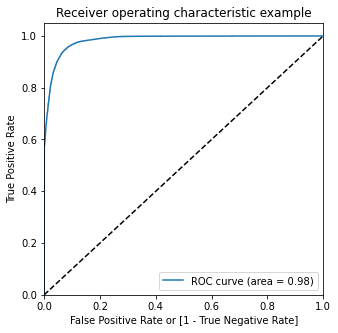

In [59]:
fpr, tpr, thresholds = metrics.roc_curve( y_rus_pred_final.Defaulted, y_rus_pred_final.Defaulted_Prob, drop_intermediate = False )
draw_roc(y_rus_pred_final.Defaulted, y_rus_pred_final.Defaulted_Prob)

##### Making predictions on the test set

In [60]:
X_test.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
38791,-0.176598,0.111843,0.494099,0.006493,1.459532,3.267206,2.843457,-0.356961,-0.432016,0.283425,...,0,0,0,0,0,0,0,0,0,0
149970,0.818634,-0.023115,-0.228400,-0.359876,-0.396947,1.024233,-0.814107,-0.356961,-0.060097,0.753872,...,0,0,1,0,0,0,0,0,0,0
107218,-0.425406,1.138901,-1.054112,1.644073,-0.396947,0.103346,1.122250,-0.356961,0.058580,0.275314,...,0,0,0,0,0,0,0,0,0,1
165530,-0.375645,-0.533213,0.184457,-0.084773,3.316011,1.024233,0.907100,-0.356961,-0.071841,-0.499301,...,0,0,0,0,0,0,0,0,0,1
82402,1.254048,0.576192,-0.228400,-0.469396,-0.396947,0.103346,0.046496,-0.356961,0.589937,1.435209,...,0,0,0,0,0,0,0,0,0,1


In [63]:
X_rus_sm.shape

(66098, 16)

In [64]:
X_test_sm.shape

(57692, 118)

In [65]:
X_test_sm = sm.add_constant(X_test[col])
y_test_pred = res.predict(X_test_sm)

In [66]:
y_test_pred[:10]

38791     3.234246e-01
149970    4.684617e-12
107218    7.123320e-01
165530    2.335149e-05
82402     3.973816e-12
142543    1.000000e+00
23039     3.664197e-01
219001    1.070912e-05
125328    1.000000e+00
215294    6.201066e-03
dtype: float64

In [67]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
38791,3.234246e-01
149970,4.684617e-12
107218,7.123320e-01
165530,2.335149e-05
82402,3.973816e-12


In [68]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df

,defaulted
38791,0
149970,0
107218,0
165530,0
82402,0
...,...
173288,1
35740,0
122180,0
27595,0


In [69]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
y_test_df.head()

,defaulted,CustID
38791,0,38791
149970,0,149970
107218,0,107218
165530,0,165530
82402,0,82402


In [70]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [71]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,defaulted,CustID,0
0,0,38791,3.234246e-01
1,0,149970,4.684617e-12
2,0,107218,7.123320e-01
3,0,165530,2.335149e-05
4,0,82402,3.973816e-12


In [72]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Defaulted_Prob'})

# Rearranging the columns
#y_pred_final = y_pred_final.reindex_axis(['CustID','Defaulted','Defaulted_Prob'], axis=1)
y_pred_final.head()


,defaulted,CustID,Defaulted_Prob
0,0,38791,3.234246e-01
1,0,149970,4.684617e-12
2,0,107218,7.123320e-01
3,0,165530,2.335149e-05
4,0,82402,3.973816e-12


In [73]:
y_pred_final['final_predicted'] = y_pred_final.Defaulted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

,defaulted,CustID,Defaulted_Prob,final_predicted
0,0,38791,3.234246e-01,0
1,0,149970,4.684617e-12,0
2,0,107218,7.123320e-01,1
3,0,165530,2.335149e-05,0
4,0,82402,3.973816e-12,0


In [74]:
# Checking the overall accuracy.
metrics.accuracy_score(y_pred_final.defaulted, y_pred_final.final_predicted)

0.936698329057755

In [75]:
confusion2 = metrics.confusion_matrix(y_pred_final.defaulted, y_pred_final.final_predicted )
print(confusion2)
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

[[43802  2874]
 [  778 10238]]


In [117]:
print("Sensitivity/Recall:", TP / float(TP+FN))
print("Specificity:", TN / float(TN+FP))
print("Precision:", TP/float(TP+FP))
Precision = TP/float(TP+FP) 
Recall = TP/float(TP+FN)
print("F-Measure:", (2 * Precision * Recall) / (Precision + Recall))

Sensitivity/Recall: 0.9293754538852578
Specificity: 0.9384266003942069
Precision: 0.7808114704087858
F-Measure: 0.8486405835543765


In [119]:
from sklearn.metrics import classification_report
# print(classification_report(y_test, rf_best.predict(X_test)))
print(classification_report(y_pred_final.defaulted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     46676
           1       0.78      0.93      0.85     11016

    accuracy                           0.94     57692
   macro avg       0.88      0.93      0.90     57692
weighted avg       0.94      0.94      0.94     57692



#### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
rf = RandomForestClassifier(n_estimators=10, max_depth=5, max_features=8, random_state=100, oob_score=True)
rf.fit(X_rus, y_rus)

RandomForestClassifier(max_depth=5, max_features=8, n_estimators=10,
                       oob_score=True, random_state=100)

In [78]:
rf.oob_score_

0.8551695966595055

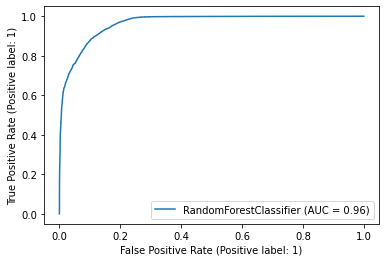

In [79]:
plot_roc_curve(rf, X_rus, y_rus)
plt.show()

##### Hyper-parameter tuning for the Random Forest

In [80]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'max_features': [5,8,10,12,15,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [81]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [82]:
%%time
grid_search.fit(X_rus, y_rus)

Fitting 4 folds for each of 720 candidates, totalling 2880 fits
CPU times: user 36.4 s, sys: 2.21 s, total: 38.6 s
Wall time: 14min 11s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'max_features': [5, 8, 10, 12, 15, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [83]:
print("best_score_:" , grid_search.best_score_)
rf_best = grid_search.best_estimator_
print("best_estimator_:", rf_best)

best_score_: 0.9525401579731274
best_estimator_: RandomForestClassifier(max_depth=20, max_features=20, min_samples_leaf=5,
                       n_jobs=-1, random_state=42)


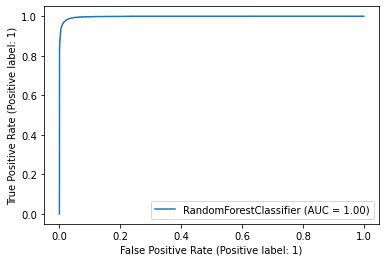

In [84]:
plot_roc_curve(rf_best, X_rus, y_rus)
plt.show()

In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_rus, dt_classifier.predict(X_rus)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_rus, dt_classifier.predict(X_rus)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

evaluate_model(rf_best)

Train Accuracy : 0.9790008774849466
Train Confusion Matrix:
[[32257   792]
 [  596 32453]]
--------------------------------------------------
Test Accuracy : 0.9449490397282119
Test Confusion Matrix:
[[43937  2739]
 [  437 10579]]


In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97     46676
           1       0.79      0.96      0.87     11016

    accuracy                           0.94     57692
   macro avg       0.89      0.95      0.92     57692
weighted avg       0.95      0.94      0.95     57692



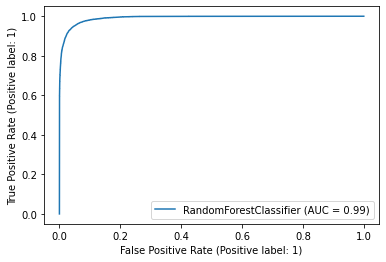

In [89]:
plot_roc_curve(rf_best, X_test, y_test)
plt.show()

In [90]:
rf_best.feature_importances_

array([2.60383142e-02, 4.55414519e-02, 1.16610616e-02, 1.72233015e-02,
       8.85764045e-04, 2.66345581e-03, 5.58312821e-03, 2.57415982e-03,
       8.99508541e-03, 1.06357114e-02, 7.52993273e-03, 3.70568156e-03,
       3.26286222e-02, 1.32176858e-02, 2.33667076e-01, 5.11733357e-01,
       1.58736735e-05, 3.68514041e-06, 2.09836067e-02, 4.05191451e-03,
       1.77925128e-03, 2.56728602e-03, 2.58564324e-03, 7.87002179e-04,
       5.82981656e-05, 9.92236236e-04, 8.37564533e-04, 1.65428025e-03,
       5.18157501e-04, 3.22513221e-04, 3.52196221e-04, 3.64327450e-04,
       4.04887095e-04, 2.64640909e-04, 3.99312671e-04, 3.78421009e-04,
       2.51743920e-04, 2.67921420e-04, 2.26846480e-04, 2.29485836e-04,
       2.27681397e-04, 1.64549570e-04, 1.74530056e-04, 1.28259547e-04,
       8.51941177e-05, 1.98291305e-04, 6.60204572e-05, 5.72138280e-05,
       4.74378512e-05, 2.98348559e-05, 3.45657026e-05, 3.50657298e-05,
       2.23005565e-05, 2.45147753e-05, 1.39061162e-05, 5.83857911e-06,
      

In [91]:
imp_df = pd.DataFrame({
    "Varname": X_rus.columns,
    "Imp": rf_best.feature_importances_
})

imp_df1 = imp_df.sort_values(by="Imp", ascending=False)

In [92]:
imp_df1.head(10)

,Varname,Imp
15,last_pymnt_amnt,0.511733
14,recoveries,0.233667
1,int_rate,0.045541
12,total_rec_int,0.032629
0,loan_amnt,0.026038
18,term_ 60 months,0.020984
3,dti,0.017223
116,initial_list_status_w,0.015017
13,total_rec_late_fee,0.013218
2,annual_inc,0.011661


#### Xgboost Classifier -  On Unbalanced data

In [95]:
!pip install xgboost
import xgboost as xgb 

     |████████████████████████████████| 1.7 MB 2.3 MB/s eta 0:00:01


In [96]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [97]:
# Fit the model to our train and target
xgb_cfl.fit(X_train, y_train)  # default 

# Get our predictions
xgb_predictions = xgb_cfl.predict(X_test)


In [98]:
xgb_predictions_prob = xgb_cfl.predict_proba(X_test)
xgb_predictions_prob

array([[8.31510723e-01, 1.68489292e-01],
       [9.99829948e-01, 1.70053274e-04],
       [7.66727448e-01, 2.33272552e-01],
       ...,
       [9.87377286e-01, 1.26227085e-02],
       [8.95507812e-01, 1.04492202e-01],
       [9.99890268e-01, 1.09746295e-04]], dtype=float32)

In [99]:
accuracy_score(y_test, xgb_predictions)

0.9784372183318311

In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

evaluate_model(xgb_cfl)

Train Accuracy : 0.9848215214301397
Train Confusion Matrix:
[[139048    977]
 [  1650  31399]]
--------------------------------------------------
Test Accuracy : 0.9784372183318311
Test Confusion Matrix:
[[46223   453]
 [  791 10225]]


In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb_cfl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     46676
           1       0.96      0.93      0.94     11016

    accuracy                           0.98     57692
   macro avg       0.97      0.96      0.96     57692
weighted avg       0.98      0.98      0.98     57692



##### Hyperparameter Tunning - Random Search

In [101]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split

# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5

param_comb = 800

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)


In [ ]:
# random_search.fit(X_train, y_train)

In [ ]:
# print('\n Best estimator:')
# print(random_search.best_estimator_)
# print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
# print(random_search.best_score_ )
# print('\n Best hyperparameters:')
# print(random_search.best_params_)

In [ ]:
# xgb_predictions_hpt = random_search.predict(X_test)
# accuracy_score(y_test, xgb_predictions_hpt)

##### Feature Importance Xgboost Model

In [103]:
xgb_cfl.feature_importances_

array([8.6391615e-03, 8.8341422e-03, 1.3989316e-03, 3.3142390e-03,
       1.1578518e-03, 1.0186770e-03, 1.0710815e-03, 7.2757336e-03,
       1.0707765e-03, 1.1205977e-03, 1.0551381e-03, 2.2532430e-02,
       6.1498974e-03, 5.0490522e-03, 7.5878841e-01, 2.8393518e-02,
       1.6147360e-03, 0.0000000e+00, 3.7987705e-02, 1.3595903e-03,
       4.4368077e-03, 2.0606925e-03, 1.2766150e-03, 5.2176625e-04,
       1.3249754e-03, 4.4771572e-04, 0.0000000e+00, 9.9000323e-04,
       8.2877005e-04, 6.3756987e-04, 8.9281815e-04, 1.4014103e-03,
       7.4259745e-04, 5.9555803e-04, 9.5419632e-04, 7.9495669e-04,
       1.4509081e-03, 1.2383128e-03, 1.3365598e-03, 1.1244020e-03,
       1.6038856e-03, 1.1094497e-03, 8.8129489e-04, 0.0000000e+00,
       0.0000000e+00, 4.5767662e-04, 0.0000000e+00, 1.0919194e-03,
       0.0000000e+00, 0.0000000e+00, 1.3050168e-03, 6.9113557e-05,
       1.7318884e-03, 7.7035266e-04, 0.0000000e+00, 0.0000000e+00,
       1.1430089e-03, 7.2846065e-05, 0.0000000e+00, 6.8451063e

In [107]:
# Scatter plot
!pip install plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
trace = go.Scatter(
    y = xgb_cfl.feature_importances_,
    x = X.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1.3,
        size = 12,
        color = xgb_cfl.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = X.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'XGBOOST Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')

     |████████████████████████████████| 28.8 MB 9.5 MB/s eta 0:00:012


In [110]:
imp_df2 = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": xgb_cfl.feature_importances_
})

imp_df2 = imp_df2.sort_values(by="Imp", ascending=False)
imp_df2.head(10)

,Varname,Imp
14,recoveries,0.758788
18,term_ 60 months,0.037988
116,initial_list_status_w,0.031332
15,last_pymnt_amnt,0.028394
11,out_prncp,0.022532
1,int_rate,0.008834
0,loan_amnt,0.008639
7,pub_rec,0.007276
12,total_rec_int,0.006150
13,total_rec_late_fee,0.005049


# <span style='color:Blue'> Conclusion </span>

● Steps followed:

    (1) Loading the data
    (2) Exploratory Data Analysis
    (3) Treating missing values and outliers
    (4) Feature engineering
    (5) Train test split
    (6) Data Modeling
    (7) Cross validation
    (8) Hyper parameter tuning

● Used the following Machine learning models to predict the "Probabilities of default": 

        Logistic Regression 
        Random Forest  
        XGBoost 

● Used balanced data for Random Forest and Logistic Regression, and unbalanced data for XGBoost.

● To evaluate the model performance, I've consider accuracy, precision, recall and F1-score.

    Accuracy Result:

        Logistic Regression:
        Accuracy (Train) - 0.9343
        Accuracy (Test) - 0.9366

        Random Forest:
        Accuracy (Train) - 0.9790
        Accuracy (Test) - 0.9449

        XGBoost:
        Accuracy (Train) - 0.9848
        Accuracy (Test) - 0.9784


● Among all the three models, XGBoost is the best performer.

● Seven most important predictor variables in the following models:

    Logistic Regression - loan_amnt, total_rec_int, term_ 60 months, int_rate, recoveries, last_pymnt_amnt,                                     initial_list_status_w
    
    Random Forest  - last_pymnt_amnt, recoveries, int_rate, total_rec_int, loan_amnt, term_ 60 months, dti
    
    XGBoost - recoveries, term_ 60 months, initial_list_status_w, last_pymnt_amnt, out_prncp, int_rate, loan_amnt